<a href="https://colab.research.google.com/github/jsKim-prog/AIStudy24/blob/master/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📝 인공신경망을 구성하는 절차
1. 더미데이터 준비
2. 훈련용, 검증용, 테스트용으로 나눔
3. 심층을 만듦(dense)
4. model에 적용(Sequential)
5. compile 진행(최적화 기법 적용 : adam)
6. fit(훈련)
7. evaluate(검증)

### 📌 **손실곡선**
* fit() 메서드로 모델을 훈련하는 동안 훈련과정이 상세하게 출력되어 확인할 수 있다.(에포크 횟수, 손실, 정확도)
* 아래쪽에 `<keras.src.callbacks.history.History at 0x7d2d5ed54580>` 이 출력메시지가 나옴
* 코랩 노트북의 코드셀은 print() 명령어를 사용하지 않아도 마지막 라인에 실행결과를 자동으로 출력
* 다시말해 `fit()` 메서드는 History라는 클래스 객체를 반환함(훈련과정의 지표, 손실, 정확도 등 내장)
* 이 값을 잘 활용하면 그래프를 그릴 수 있다.

In [27]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input/255.0
train_scaled, val_scaled, train_target, val_target = \
    train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
    # \ : 엔터효과 제거용(한줄로 긴 문장을 자름)

In [28]:
print(f"훈련데이터 : {train_scaled.shape}, {train_target.shape}")
print(f"테스트데이터 : {test_input.shape}, {test_target.shape}")
print(f"검증데이터 : {val_scaled.shape}, {val_target.shape}")

훈련데이터 : (48000, 28, 28), (48000,)
테스트데이터 : (10000, 28, 28), (10000,)
검증데이터 : (12000, 28, 28), (12000,)


In [29]:
def model_fn(a_layer=None): # 모델을 만드는 간단한 함수 정의(하나의 매개변수를 받아 리턴)
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    # model_fn 함수에 케라스 층을 추가하면 은닉층 뒤에 하나의 층을 추가함
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

# None : 값의 부재를 나타내는 데이터타입 -> is None-> True, False

In [30]:
model = model_fn()
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy']) # 다중분류, 정확도

In [6]:
# fit( ) 메서드 결과를 history 변수에 담아봄
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
# time : 21.21s

#### **훈련과정 출력 조정(verbose)**
* verbose=0 : 훈련과정을 나타내지 않음
* verbose=1 : 기본값, 에포크마다 진행막대와 손실 등의 지표 출력
* verbose=2 : 진행막대 빼고 출력

In [7]:
print(history)

In [8]:
print(history.history.keys())

# 훈련측정 값이 담겨있는 history 딕셔너리가 존재
# 'accuracy': 정확도, 'loss' : 손실

# accuracy는 compile() 시 metrics=['accuracy'] 로 추가했기 때문에 histrory에 추가됨

dict_keys(['accuracy', 'loss'])


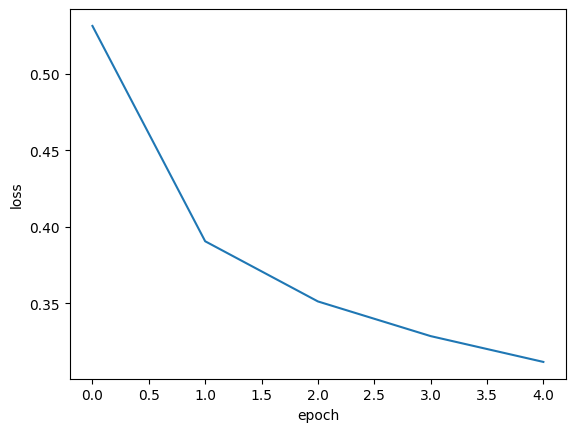

In [9]:
import matplotlib.pyplot as plt
# history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트로 그래프로 처리가 가능
plt.plot(history.history['loss'])
plt.xlabel('epoch') # 파이썬 인덱스는 0부터 시작, 5개의 에포크가 0~4까지 x축에 표현
plt.ylabel('loss')  # 손실된 값

plt.show()

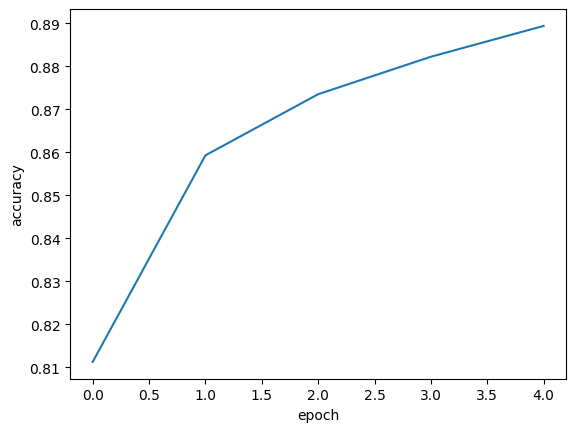

In [10]:
# 정확도 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
# 결과 : 에포크마다 손실이 감소하고 정확도가 향상됨

In [11]:
# 이번에는 에포크 횟수를 20번으로 늘려보자.

model = model_fn()  #위에서 만든 메서드로 모델 생성(3개층 : 입력층, 은닉층, 출력층)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


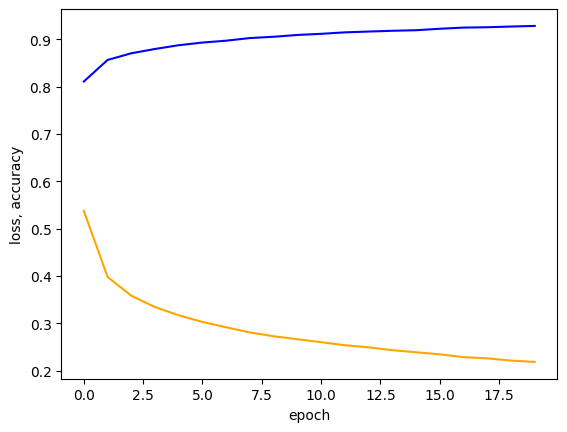

In [14]:
plt.plot(history.history['loss'], color='orange')   # 손실률
plt.plot(history.history['accuracy'], color='blue') # 정확도
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.show()

### 📌 **검증손실**
* 예전에 확률적 경사하강법을 사용했을 때 과대/과소 적합과 에포크 사이에 관계 부분이 있었다.
* 인공신경망은 모두 일종의 경사하강법을 사용하기 때문에 동일한 개념이 여기에도 적용됨

* 에포크에 따른 과대적합, 과소적합을 파악하려면 훈련세트 점수와 검증세트에 대한 점수도 필요함
* 그래서 위에 처럼 훈련세트의 손실만 그리면 파악이 어렵다. -> 검증 손실을 이용해서 과대/과소 적합을 응용하겠다.



#### 🔖 **Keypoint**
**손실을 사용하는 것과 정확도를 사용하는 것의 차이는?**

* 인공신경망 모델이 최적화하는 대상은 정확도가 아니라 손실함수임
* 손실감소에 비례하여 정확도가 높아지지 않는 경우도 있는데 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실함수의 값을 확인하는 것이 더 좋은 방법임

In [15]:
model = model_fn()  #위에서 만든 메서드로 모델 생성(3개층 : 입력층, 은닉층, 출력층)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target)) # validation_data=(val_scaled, val_target) : 검증데이터 함께 넣어 훈련

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7608 - loss: 0.6817 - val_accuracy: 0.8484 - val_loss: 0.4271
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8512 - loss: 0.4081 - val_accuracy: 0.8586 - val_loss: 0.3910
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8686 - loss: 0.3628 - val_accuracy: 0.8598 - val_loss: 0.3859
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8755 - loss: 0.3391 - val_accuracy: 0.8621 - val_loss: 0.3755
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8849 - loss: 0.3211 - val_accuracy: 0.8603 - val_loss: 0.3916
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8915 - loss: 0.3082 - val_accuracy: 0.8658 - val_loss: 0.3957
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8952 - loss: 0.2964 - val_accuracy: 0.8652 - val_loss: 0.3949
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9003 - loss: 0.2868 - 

In [16]:
print(history.history.keys())
# 'accuracy', 'loss', 'val_accuracy', 'val_loss' : 검증세트 정확도, 검증세트 손실 추가

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


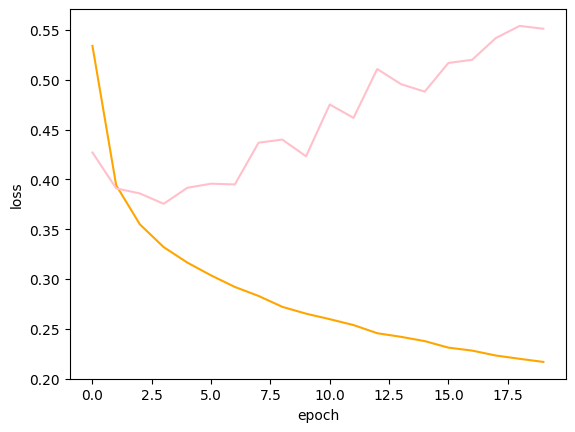

In [17]:
plt.plot(history.history['loss'], color='orange')
plt.plot(history.history['val_loss'], color='pink')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

**결과분석**
* 초기에 검증손실이 감소하다가 다섯번째 에포크만에 다시 상승함
* 훈련손실은 꾸준히 감소하기 때문에 과대적합모델이 만들어짐
* 검증손실이 상승하는 시점을 가능한 늦추면 세트에 대한 손실이 줄어들고 검증세트에 대한 정확도가 증가할 거 같다.
* 과대적합을 막기 위한 방법으로 예전에 사용했던 규제방식 대신 신경망에 특화된 규제방법(드롭아웃)을 나중에 해보자.

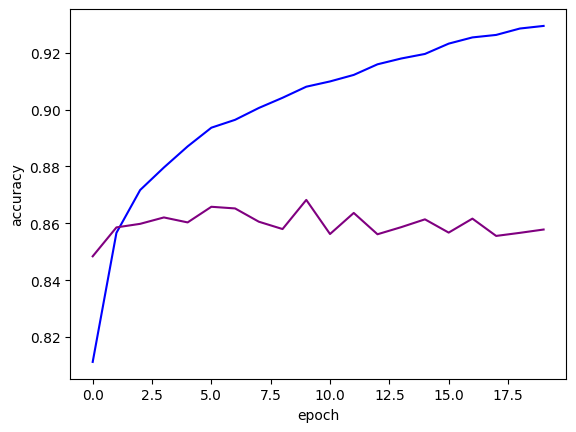

In [19]:
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


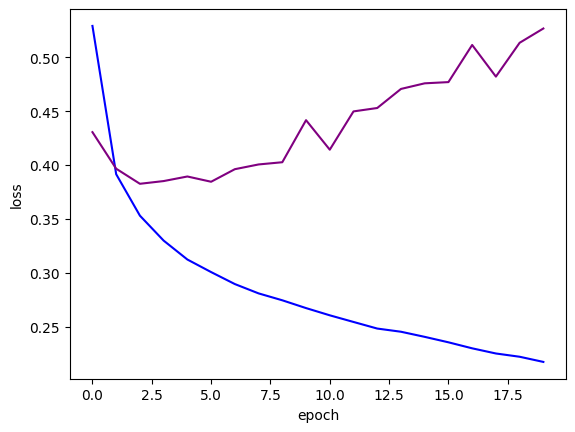

In [20]:
# 지금은 옵티마이저 하이퍼파라미터를 조절하여 과대적합을 완화시켜본다.
# RMSprop 옵티마이저는 많은 문제에 잘 작동함-> 다른 방법은 adam 이 있다.

model = model_fn()
model.compile(optimizer='RMSprop', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


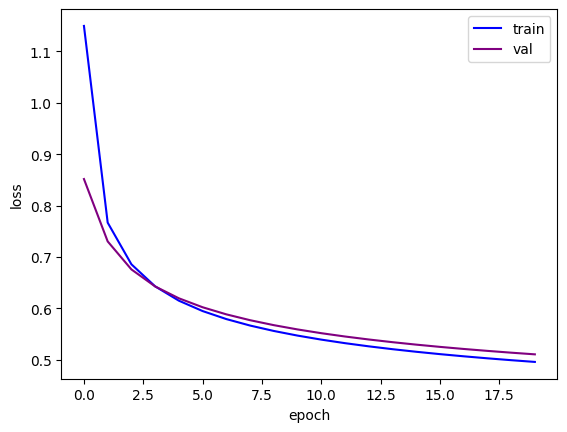

In [21]:
model = model_fn()
adagrad = keras.optimizers.Adagrad()    # Adagrad 기법으로 최적화
model.compile(optimizer=adagrad, loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'], color='orange')
plt.plot(history.history['val_loss'], color='pink')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

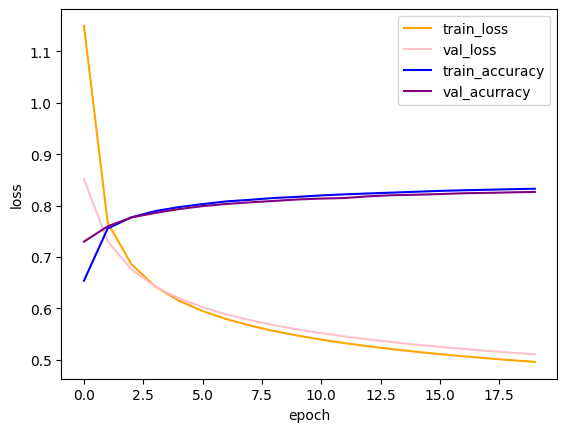

In [23]:
plt.plot(history.history['loss'], color='orange')
plt.plot(history.history['val_loss'], color='pink')
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_acurracy'])
plt.show()

In [24]:
# adam 으로 최적화
model = model_fn()

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

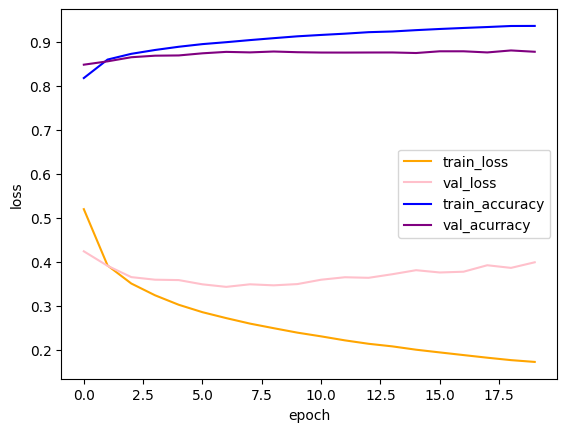

In [26]:
plt.plot(history.history['loss'], color='orange')
plt.plot(history.history['val_loss'], color='pink')
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss','train_accuracy', 'val_acurracy'])
plt.show()

### 📌 **드롭아웃(Dropout)**
* 드롭아웃은 딥러닝의 기초가 되는 힌턴이 소개하였다.
* 훈련과정에서 층이 있는 일부 뉴런을 랜덤하게 꺼서(뉴런 출력을 0으로 만듦) 과대 적합을 막음)
* 어떤 샘플을 처리할 때 은닉층의 두번째 뉴런이 드롭아옷되어 h2 출력이 없음
* 다른 샘플을 처리할 때는 은닉층의 첫번째 뉴런이 드롭아웃되어 h1 출력이 없음
* 뉴런은 랜덤하게 드롭아웃되고 얼마나 많은 뉴런을 드롭할지 우리가 하이퍼파라미터에 정할 것임


---


* 드롭아웃이 왜 과대적합을 막을 수 있을지 생각을 해보면 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 함
* 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있는 것

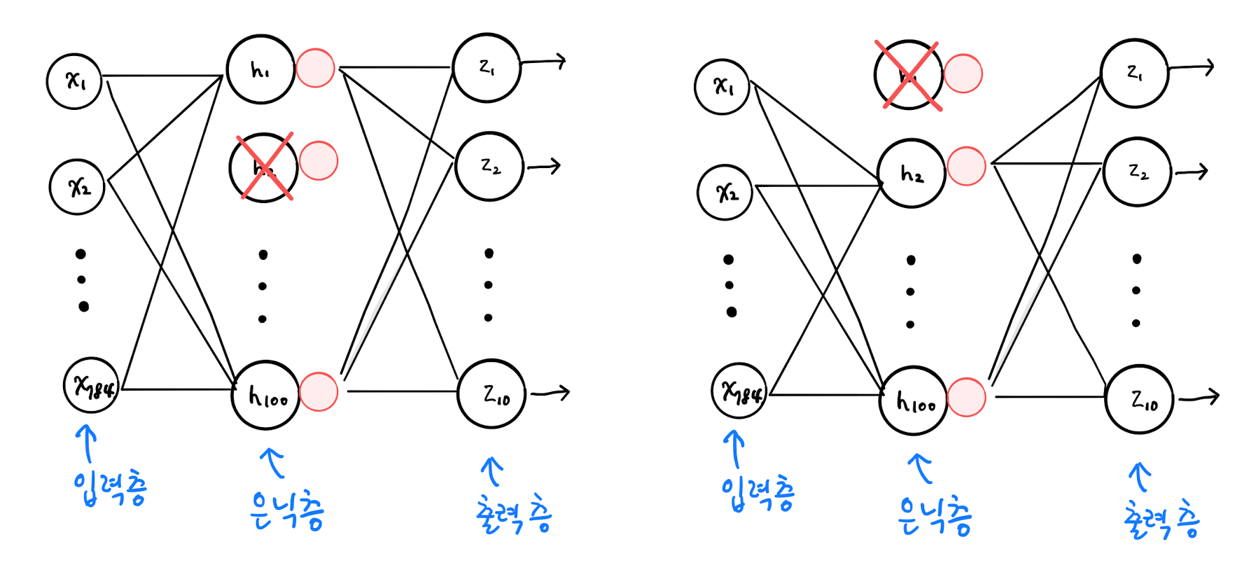

**또 다른 분석**
* 앞의 드롭아웃이 적용된 2개의 신경망 그림을 보면 드롭아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블하는 것처럼 상상하게 됨
* 앙상블 :  더 좋은 예측을 만들기 위해 여러개의 모델을 훈련하는 머신러닝 알고리즘 -> 과대적합을 막아주는 좋은 기법

* 케라스에서 드롭아웃을 keras.layers.Dropout으로 제공
* 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듦
* 드롭아웃이 층처럼 사용되지만 훈련되는 파라미터는 없음


In [32]:
model= model_fn(keras.layers.Dropout(0.3))  #30% 정도 드롭아웃
model.summary() # 모델 확인

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

* 은닉층 뒤에 추가된 드롭아웃층(3번째 값)은 훈련되는 모델 파라미터가 없음
* 입력과 출력의 크기가 같음
* 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음

**주의사항**
* 훈련이 끝난뒤 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않는다.
* 훈련된 모든 뉴런을 사용해야 올바른 예측이 수행됨
* 텐서플로와 케라스는 모델을 평가와 예측에 사용할 때 자동으로 드롭아웃을 적용하지 않음


In [35]:
# 훈련손실과 검증손실의 그래프를 그려보자.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
histrory = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))


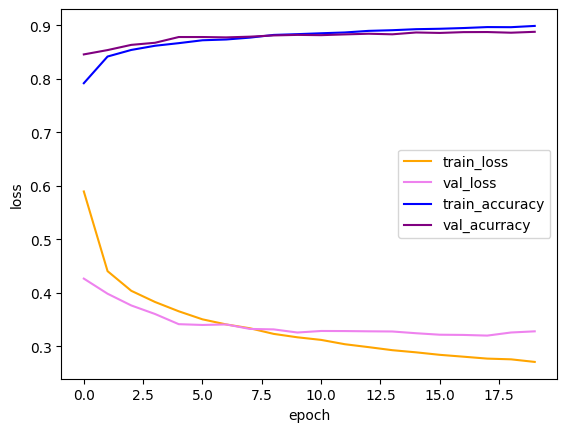

In [38]:
plt.plot(histrory.history['loss'], color='orange')
plt.plot(histrory.history['val_loss'], color='violet')
plt.plot(histrory.history['accuracy'], color='blue')
plt.plot(histrory.history['val_accuracy'], color='purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss','train_accuracy', 'val_acurracy'])
plt.show()

# 과대적합이 확실히 줄어듬-> 10번째 에포크가 검증손실의 감소가 멈추지만 크게 상승하지도 않음
# 20번-> 10번으로 줄임

* 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weight() 메서드가 있다.
> https://www.tensorflow.org/guide/checkpoint?hl=ko
* 텐서플로의 체크포인트 포멧으로 저장하지만 .h5인 경우 HDF5 포맷으로 저장
> https://geunuk.tistory.com/466


In [39]:
# 차후에 재활용하기 위해서 모델저장과 복원도 해본다.
model= model_fn(keras.layers.Dropout(0.3))  #30% 정도 드롭아웃
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))
model.save('model-whole.keras') # 모델저장



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.save_weights('model.weights.h5')  # HDF5 형식으로도 저장됨

In [41]:
# 이제는 저장한 모델을 불러와 테스트를 진행해 보자.
!ls -al model*
# ls : 리스트

-rw-r--r-- 1 root root 971928 Jan 10 05:51 model.weights.h5
-rw-r--r-- 1 root root 974765 Jan 10 05:47 model-whole.keras


* 실험 1

 훈련하지 않은 새로운 모델을 만들고 model.weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용

In [42]:



model=model_fn(keras.layers.Dropout(0.3))   # 훈련하지 않은 새로운 모델

model.load_weights('model.weights.h5')  #이전에 저장했던 모델 파라미터 로딩
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

* 이때 사용하는 메서드는 `save_weights()`와 쌍을 이루는 `load_weights()` 메서드
* 주의사항 : `load_weights()` 메서드를 사용하려면 `save_weights()` 메서드로 저장했던 모델과 정확히 같은 구조를 가져야 함

In [43]:
# 모델의 검증 정확도 확인
# 10개의 확률 중 가장 큰 값의 인덱스를 골라 (.argmax) 타깃 레이블과 비교하여 정확도를 계산해보자.
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels== val_target)) # 88.01% 평균

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
0.8801666666666667


* predict() 메서드는 사이킷런과 다른 샘플마다 10개의 클래스에 대한 확률을 반환(다중분류)

* 10개의 확률중 가장 큰 값의 인덱스를 골라(.argmax) 타깃 레이블과 비교하여 정확도 파악
* axis=-1 : 배열의 마지막 차원을 따라 최대값을 고름(-1 : 전체)
* 패션 MNIST 데이터셋에서 덜어낸 검증세트의 샘플수는 12,000개-> predict()메서드는 (12,000, 10) 크기의 배열 반환
* 검증세트는 2차원 배열이므로 마지막 차원은 1이 됨
* 예를 들어 아래 그림처럼 5*3 배열에 axis=1로 한 값과 axis=0으로 한 값의 인덱스를 반환

* argmax()로 고른 인덱스(val_labels)와 타깃(val_target)을 비교하여 같으면 1이 되고 다르면 0이 됨-> 이를 평균으로 출력해 봄(정확도)


* axis=1 이면 열을 따라 각 행의 최대값의 인덱스를 선택하고
* axis=0이면 행을 따라 각 열의 최대값의 인덱스를 선택
* 그 다음 라인은 argmax()로 고른 인덱스(val_labels)와 타깃(val_target)을 비교 -> 두 배열에서 각 위치의 값이 같으면 1, 다르면 0(평균하면 정확도가 됨)

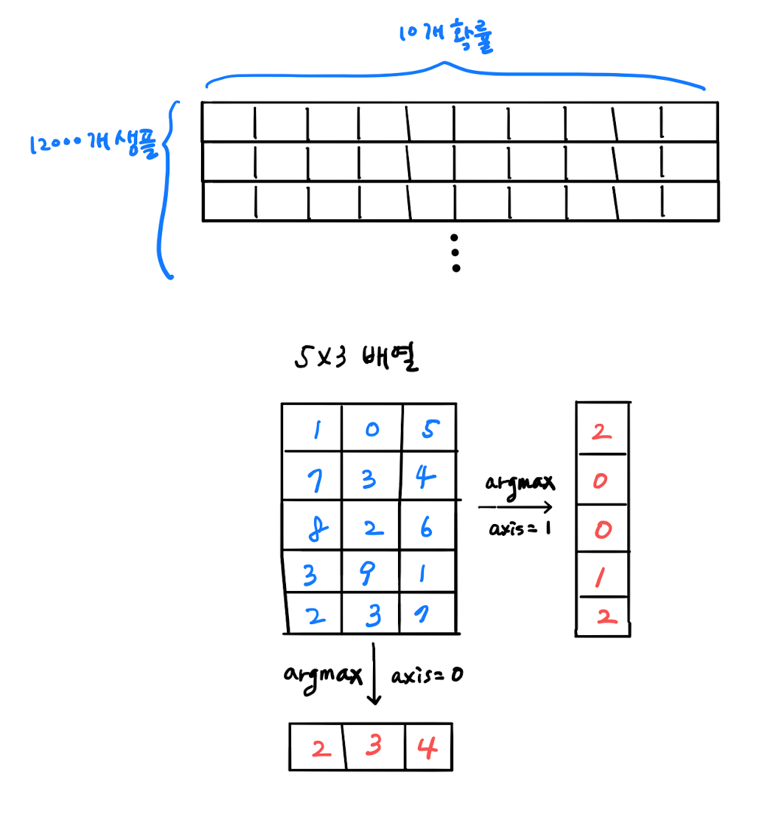

In [44]:
# 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력해봄
model = keras.models.load_model('model-whole.keras')    # load_model() : 저장됨 케라스 파일 읽기
model.evaluate(val_scaled, val_target)  # 같은 모델을 불러와서 정확도가 같음


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8839 - loss: 0.3268


[0.3329256772994995, 0.8801666498184204]

**현 상태 분석**
* 20번의 에포크 동안 모델을 훈련하여 검증점수가 상승하는 지점을 확인
* 모델을 과대적합 되지않은 에포크만큼 다시 훈련
* 모델을 두번씩 훈련하지 않고 한번에 끝내는 방법을 연구해보자. -> 케라스 콜백

* 실험 2

  * 아예 파일로 새로운 모델을 만들고 바로 사용해보자.
  * 추가적으로 콜백이라는 것을 활용해보자.


### 📌 콜백(callback)
* 훈련과정 중간에 어떤 작업을 수행할 수 있게 하는 객체, keras.Callback 패키지에 있다.
* fit() 메서드의 callback 매개변수에 리스트로 전달하여 사용
* 지금 우리가 사용할 콜백은 ModelCheckpoint 콜백으로 에포크마다 모델을 저장함
* save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다.

In [46]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])
# 모델훈련후 best-model.keras에 최상의 검증점수를 낸 모델이 저장됨

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
model = keras.models.load_model('best-model.keras')
#load_model로 저장했던 값을 불러와 다시 예측 실행
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8850 - loss: 0.3181


[0.32040709257125854, 0.8850833177566528]

* keras.callbacks.ModelCheckpoint 콜백이 가장 낮은 검증점수의 모델을 자동으로 저장해 주었음
* 여전히 20번의 에포크동안 훈련을 함
* 사실 검증점수가 상승하기 시작하면 그 이후에는 과대적합이 더 커지기 때문에 훈련을 계속할 필요가 없음
* 이때 훈련을 종료하면 자원과 시간을 아낄 수 있음-> 조기종료(early stopping)
* 에포크의 횟수를 제한하는 역할이지만 모델이 과대적합 되는 것을 막아주기도 함-규제방법 중 하나

* 케라스에는 조기종료를 위한 EarlyStopping 콜백을 제공함
* 이 콜백의 patience 매개변수는 검증점수가 향상되지 않더라도 참을 에포크 회수로 지정
* patience=2 : 2번의 연속 검증점수가 향상되지 않으면 훈련을 중지(patience : 인내심)
* restore_best_weights=True : 가장 낮은 검증 손실을 낸 모델 파라미터로 돌림

In [49]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
#가장 낮은 검증손실의 모델을 파일에 저장하고 검증손실이 다시 상승할 때 훈련 중지
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

#훈련을 중지하고 현재 모델의 파라미터를 최상의 파라미터로 되돌림
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7298 - loss: 0.7873 - val_accuracy: 0.8494 - val_loss: 0.4178
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8377 - loss: 0.4529 - val_accuracy: 0.8641 - val_loss: 0.3778
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8516 - loss: 0.4094 - val_accuracy: 0.8641 - val_loss: 0.3687
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8604 - loss: 0.3890 - val_accuracy: 0.8709 - val_loss: 0.3520
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8668 - loss: 0.3693 - val_accuracy: 0.8751 - val_loss: 0.3387
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8717 - loss: 0.3542 - val_accuracy: 0.8752 - val_loss: 0.3380
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8722 - loss: 0.3484 - val_accuracy: 0.8784 - val_loss: 0.3398
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8780 - loss: 0.3398

In [50]:
print(early_stopping_cb.stopped_epoch)  # 조기종료 시점 에포크

11


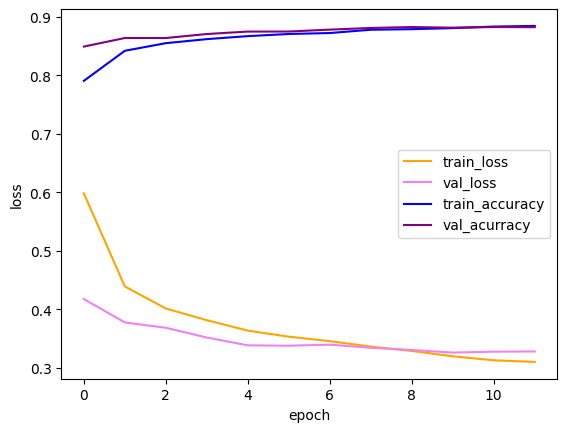

In [54]:
plt.plot(history.history['loss'], color='orange')
plt.plot(history.history['val_loss'], color='violet')
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss','train_accuracy', 'val_acurracy'])
plt.show()

In [55]:
model.evaluate(val_scaled, val_target)  # 검증세트 성능확인 : (32.6%, 88.17%) - 에포크 11번
# 컴퓨터의 자원과 시간을 아끼고 콜백과 함께 사용하면 최상의 모델을 자동으로 저장해준다는 것을 명심

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8817 - loss: 0.3224


[0.3262506127357483, 0.8817499876022339]